## Predicting Diabetes with Decision Tree 

In [31]:
#Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn import tree
from sklearn.metrics import roc_curve


In [32]:
# Read the dataset

df = pd.read_csv('/Users/ashleysmacbook/Desktop/Project-4/diabetes_binary_health_indicators_BRFSS2015.csv')

# Display the first few rows of the dataset
print(df.head())

# Explore basic statistics and information about the dataset
print(df.describe())
print(df.info())

   Diabetes_binary  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0                0       1         1          1   40       1       0   
1                0       0         0          0   25       1       0   
2                0       1         1          1   28       0       0   
3                0       1         0          1   27       0       0   
4                0       1         1          1   24       0       0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                     0             0       0  ...              1   
1                     0             1       0  ...              0   
2                     0             0       1  ...              1   
3                     0             1       1  ...              1   
4                     0             1       1  ...              1   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  \
0            0        5        18        15         1    0    9          4

In [33]:
# Drop any missing values
df = df.dropna()

# Split the dataset into features (X) and target variable (y)
X = df.drop('Diabetes_binary', axis=1)  
y = df['Diabetes_binary']


In [34]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
# Standardize using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [36]:
# Instantiate the Decision Tree classifier
decision_tree = tree.DecisionTreeClassifier(random_state=42)

In [37]:
# Train the model
decision_tree.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [38]:
# Standardize the test set using the scaler from the training set
X_test_scaled = scaler.transform(X_test)


In [39]:
# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree Accuracy: {accuracy_dt}')

Decision Tree Accuracy: 0.7985848312835068


In [40]:
# Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print('Confusion Matrix (Decision Tree):\n', conf_matrix_dt)

Confusion Matrix (Decision Tree):
 [[38172  5567]
 [ 4652  2345]]


In [41]:
# Classification Report
class_report_dt = classification_report(y_test, y_pred_dt)
print('Classification Report (Decision Tree):\n', class_report_dt)

Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.89      0.87      0.88     43739
           1       0.30      0.34      0.31      6997

    accuracy                           0.80     50736
   macro avg       0.59      0.60      0.60     50736
weighted avg       0.81      0.80      0.80     50736



In [42]:
# ROC-AUC Score
roc_auc_dt = roc_auc_score(y_test, decision_tree.predict_proba(X_test_scaled)[:, 1])
print(f'Decision Tree ROC-AUC Score: {roc_auc_dt}')

Decision Tree ROC-AUC Score: 0.6028002898545393


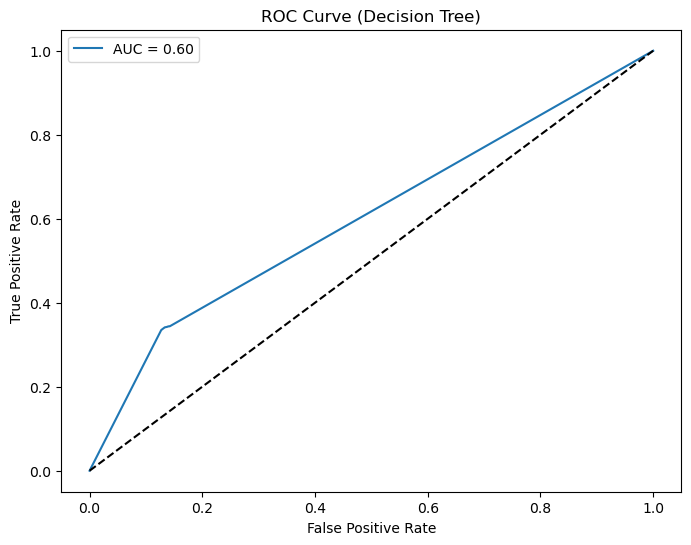

In [43]:

# Calculate ROC curve
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, decision_tree.predict_proba(X_test_scaled)[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f'AUC = {roc_auc_dt:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Decision Tree)')
plt.legend()
plt.show()


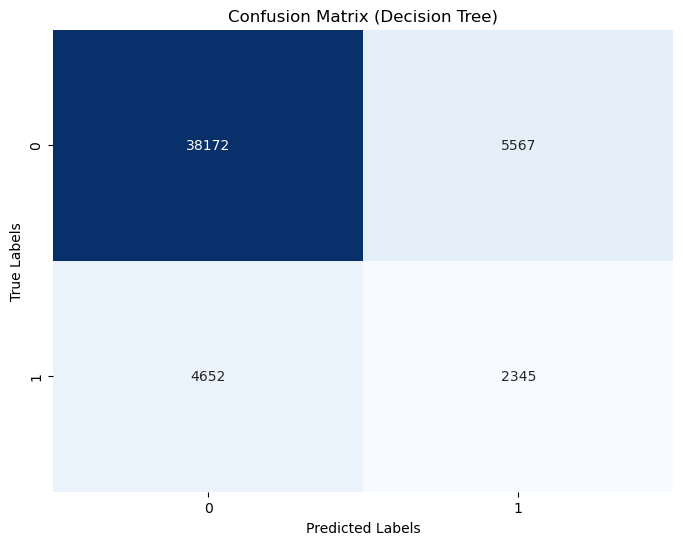

In [44]:
# Calculate the confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Decision Tree)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



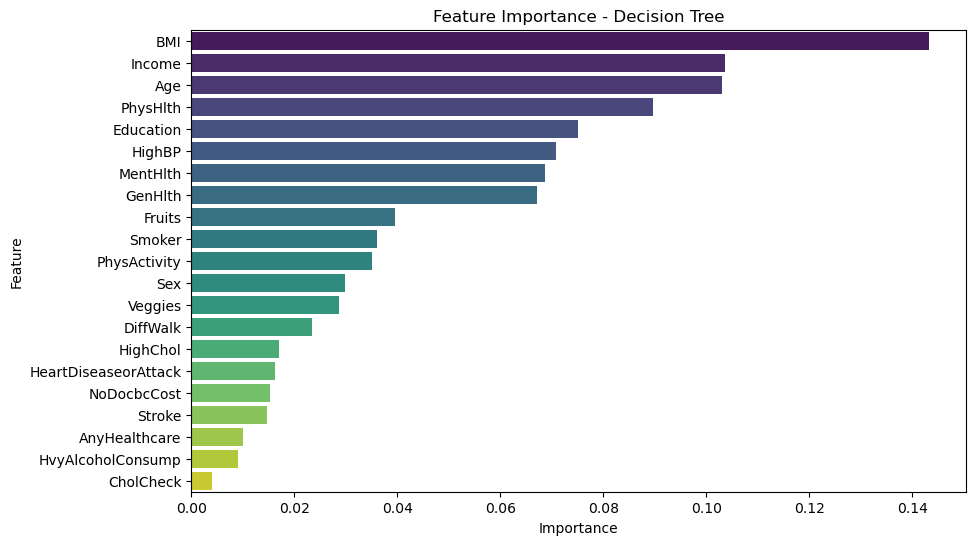

In [45]:
# Create a DataFrame to organize feature importance of the decision tree model
feat_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': decision_tree.feature_importances_})

# Sort the DataFrame based on feature importance values in descending order
feat_importance_df = feat_importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importance by plotting importance as a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importance_df, palette='viridis')
plt.title('Feature Importance - Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


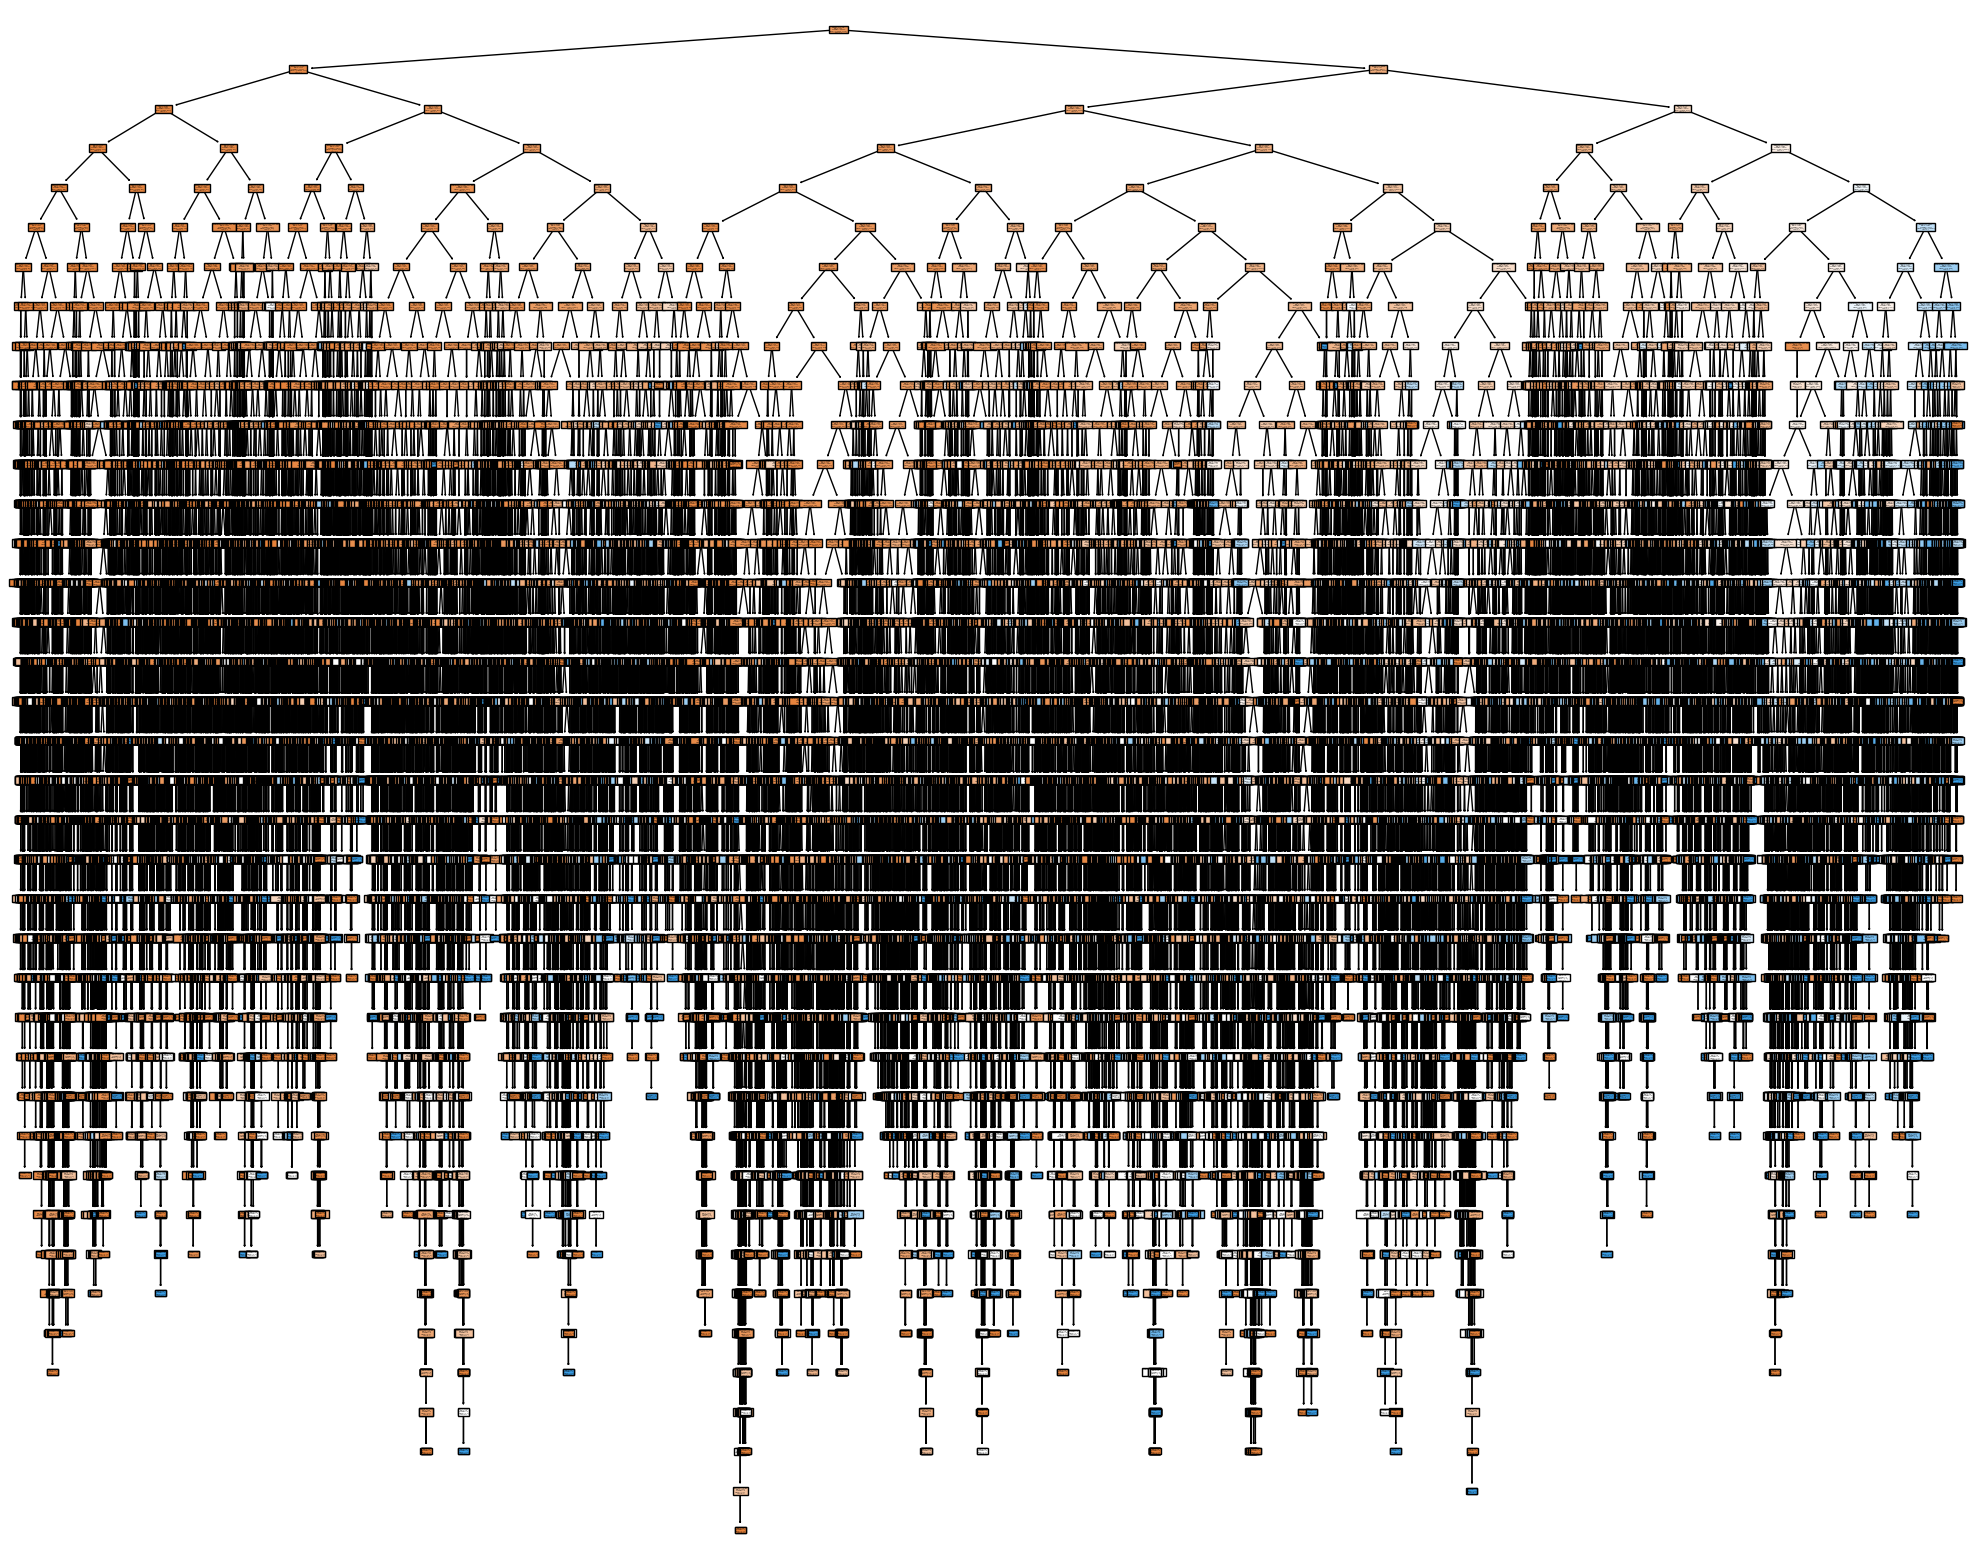

In [46]:
import matplotlib.pyplot as plt

# Plot decision tree
plt.figure(figsize=(25, 20))
_ = tree.plot_tree(decision_tree, 
                   feature_names=X.columns,  
                   class_names=["0", "1"], 
                   filled=True)
plt.show()
